In [1]:
import networkx as nx

In [2]:
G = nx.Graph()
print(G.is_directed())

H = nx.DiGraph()
print(H.is_directed())

G.graph["Name"] = "paradox"
print(G.graph)

False
True
{'Name': 'paradox'}


In [3]:
G.add_node(0, feature=0, label=0)
node_0_attr = G.nodes[0] # [0]与上一行的第一个0对应
print("Node 0 has the attributes {}".format(node_0_attr))

Node 0 has the attributes {'feature': 0, 'label': 0}


In [4]:
G.add_nodes_from([(1, {"feature":1, "label":1}), (2, {"feature":2, "label":2})])
for node in G.nodes(data=True): # 将data设置为True，可以打印出属性
    print(node)

num_node = G.number_of_nodes()
print("G has {} nodes".format(num_node))

(0, {'feature': 0, 'label': 0})
(1, {'feature': 1, 'label': 1})
(2, {'feature': 2, 'label': 2})
G has 3 nodes


In [5]:
G.add_edge(0, 1, weight=0.5)
edge_0_1_attr = G.edges[(0, 1)]
print("Edge (0, 1) has the attributes {}".format(edge_0_1_attr))

Edge (0, 1) has the attributes {'weight': 0.5}


In [6]:
G.add_edges_from([(1, 2, {"weight":0.3}), (2, 0, {"weight":0.1})])
for edge in G.edges(data=True):
    print(edge)

num_edges = G.number_of_edges()
print("G has {} edges".format(num_edges))

(0, 1, {'weight': 0.5})
(0, 2, {'weight': 0.1})
(1, 2, {'weight': 0.3})
G has 3 edges


NameError: name 'nx' is not defined

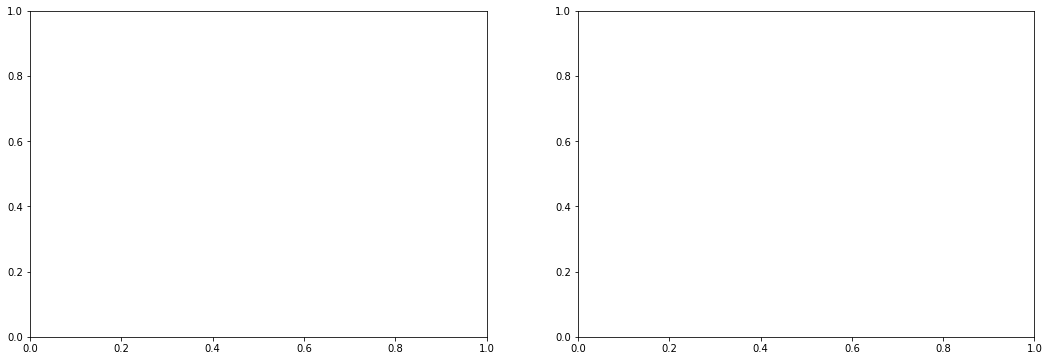

In [3]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18, 6))
f, axarr = plt.subplots(1, 2, num=1)

plt.sca(axarr[0]) # 画第一张图
nx.draw(G, with_labels=True)

plt.sca(axarr[1]) # 画第二张图
pos = nx.spring_layout(G)
nx.draw(G, with_labels=True, pos=pos, cmap = plt.get_cmap("bwr"))

In [8]:
node_id = 1
print("Node {} has degree {}".format(node_id, G.degree[node_id]))

# print(G.neighbors(node_id))
for neighbor in G.neighbors(node_id):
    print("Node {} has neighbor {}".format(node_id, neighbor))

Node 1 has degree 2
Node 1 has neighbor 0
Node 1 has neighbor 2


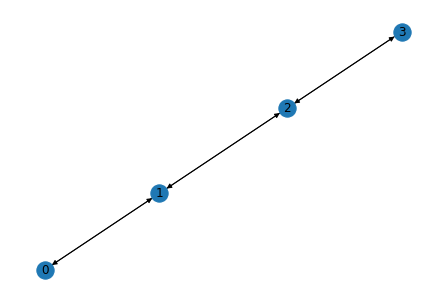

In [9]:
num_nodes = 4
G = nx.DiGraph(nx.path_graph(num_nodes))
nx.draw(G, with_labels=True)
pr = nx.pagerank(G, alpha=0.8)

In [129]:
import torch
import matplotlib.pyplot as plt
def visualize(h, color, epoch=None, loss=None):
    plt.figure(figsize=(7, 7))
    plt.xticks([])
    plt.yticks([])
    if torch.is_tensor(h):
        print("!")
        h = h.detach().cpu().numpy()
        plt.scatter(h[:, 0], h[:, 1], s=140, c=color, cmap="Set2")
        if epoch is not None and loss is not None:
            print("!")
            plt.xlabel(f'Epoch: {epoch}, Loss: {loss.item():.4f}', fontsize=16)
    else:
        print("!!")
        nx.draw_networkx(G, pos=nx.spring_layout(G), with_labels=False, node_color=color, cmap="Set2")
        plt.show()

In [130]:
from torch_geometric.datasets import KarateClub
dataset = KarateClub()
print(f"Dataset: {dataset}")
print("-"*50)
print(f"Number of graphs: {len(dataset)}")
print(f'Number of features: {dataset.num_features}')
print(f'Number of classes: {dataset.num_classes}')

Dataset: KarateClub()
--------------------------------------------------
Number of graphs: 1
Number of features: 34
Number of classes: 4


In [143]:
data = dataset[0]
print(data)
print(data.num_nodes)
print(data.num_edges)
print("%.2f" % (data.num_edges / data.num_nodes))

Data(x=[34, 34], edge_index=[2, 156], y=[34], train_mask=[34])
34
156
4.59


In [147]:
print(data.x)
print(data.edge_index)
print(data.y)
print(len(data.y))

tensor([[1., 0., 0.,  ..., 0., 0., 0.],
        [0., 1., 0.,  ..., 0., 0., 0.],
        [0., 0., 1.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 1., 0., 0.],
        [0., 0., 0.,  ..., 0., 1., 0.],
        [0., 0., 0.,  ..., 0., 0., 1.]])
tensor([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,
          1,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,
          3,  3,  3,  3,  3,  4,  4,  4,  5,  5,  5,  5,  6,  6,  6,  6,  7,  7,
          7,  7,  8,  8,  8,  8,  8,  9,  9, 10, 10, 10, 11, 12, 12, 13, 13, 13,
         13, 13, 14, 14, 15, 15, 16, 16, 17, 17, 18, 18, 19, 19, 19, 20, 20, 21,
         21, 22, 22, 23, 23, 23, 23, 23, 24, 24, 24, 25, 25, 25, 26, 26, 27, 27,
         27, 27, 28, 28, 28, 29, 29, 29, 29, 30, 30, 30, 30, 31, 31, 31, 31, 31,
         31, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 33, 33, 33, 33, 33,
         33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33],
        [ 1,  2,  3,  4,  5,  6,  7,  8,

In [132]:
print(len(data.train_mask))
print(data.train_mask.sum())
print("%.2f"%(data.train_mask.sum()/data.num_nodes))
print(data.contains_isolated_nodes())
print(data.contains_self_loops())
print(data.is_directed())

34
tensor(4)
0.12
False
False
False


In [139]:
# from IPython.display import Javascript
# display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 300})'''))
edge_index = data.edge_index
print(edge_index.shape)
print(edge_index.t().shape)

torch.Size([2, 156])
torch.Size([156, 2])


!!


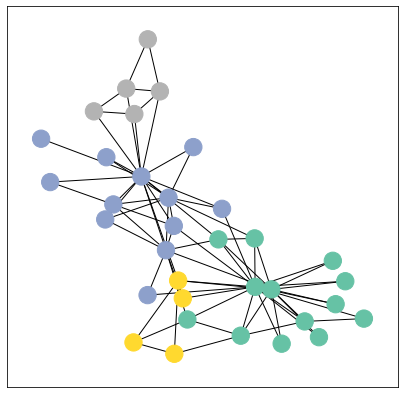

tensor([1, 1, 1, 1, 3, 3, 3, 1, 0, 1, 3, 1, 1, 1, 0, 0, 3, 1, 0, 1, 0, 1, 0, 0,
        2, 2, 0, 0, 2, 0, 0, 2, 0, 0])


In [134]:
from torch_geometric.utils import to_networkx
G = to_networkx(data, to_undirected=True)
visualize(G, color=data.y)
print(data.y)

In [135]:
from torch.nn import Linear
from torch_geometric.nn import GCNConv

class GCN(torch.nn.Module):
    def __init__(self):
        super(GCN, self).__init__()
        torch.manual_seed(12345)
        self.conv1 = GCNConv(dataset.num_features, 4)
        self.conv2 = GCNConv(4, 4)
        self.conv3 = GCNConv(4, 2)
        self.classifier = Linear(2, dataset.num_classes)

    def forward(self, x, edge_index):
        h = self.conv1(x, edge_index)
        h = h.tanh()
        h = self.conv2(h, edge_index)
        h = h.tanh()
        h = self.conv3(h, edge_index)
        h = h.tanh()
        out = self.classifier(h)
        return out, h

model = GCN()
print(model)

GCN(
  (conv1): GCNConv(34, 4)
  (conv2): GCNConv(4, 4)
  (conv3): GCNConv(4, 2)
  (classifier): Linear(in_features=2, out_features=4, bias=True)
)


torch.Size([34, 2])
[34, 2]
!


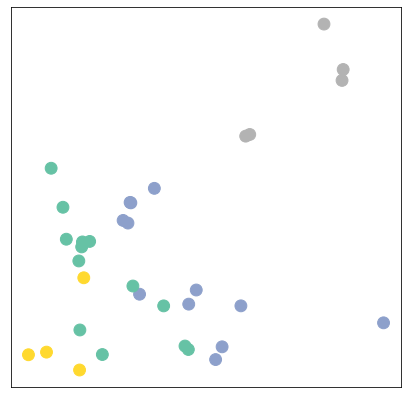

In [136]:
out, h = model(data.x, data.edge_index)
print(h.shape)
print(list(h.shape))
visualize(h, color=data.y)
# print(out[data.train_mask])
# print(data.y[data.train_mask])

!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!


C:\Users\lzy\AppData\Local\Temp\ipykernel_7008\1461567594.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(7, 7))


!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!


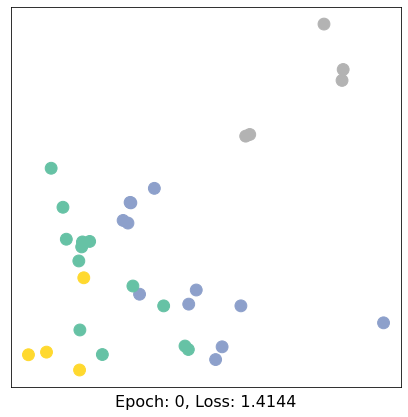

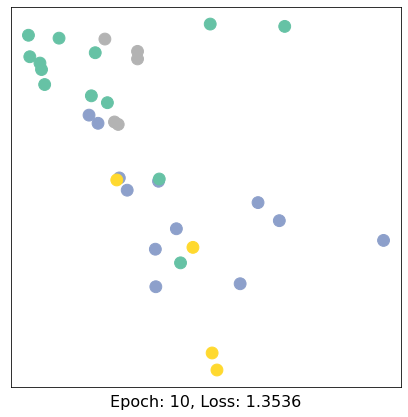

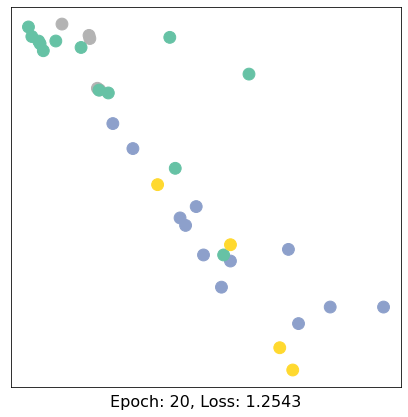

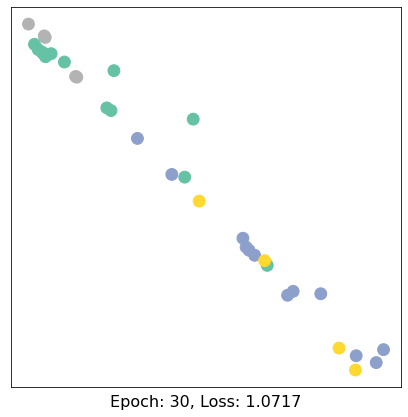

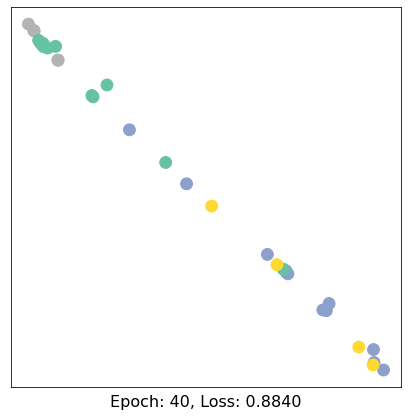

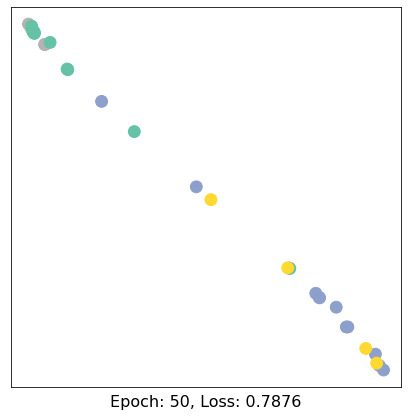

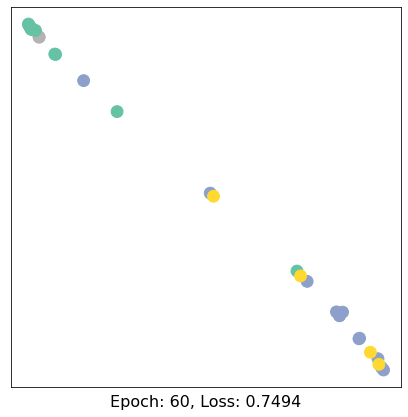

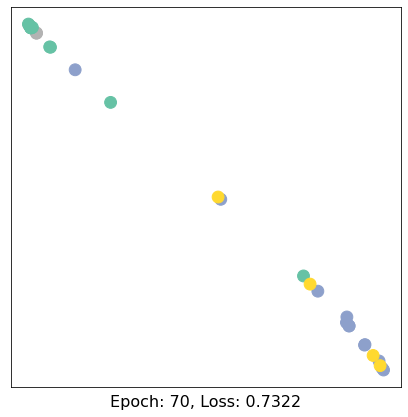

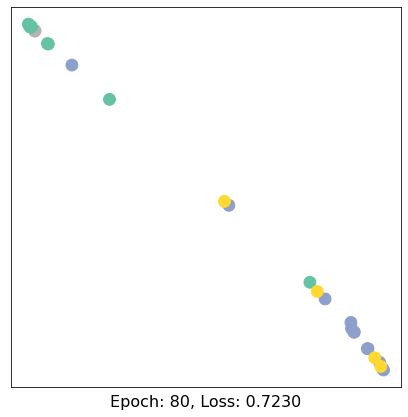

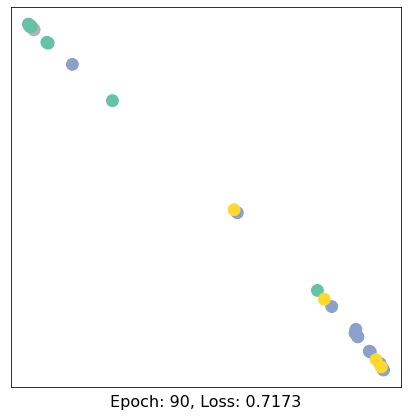

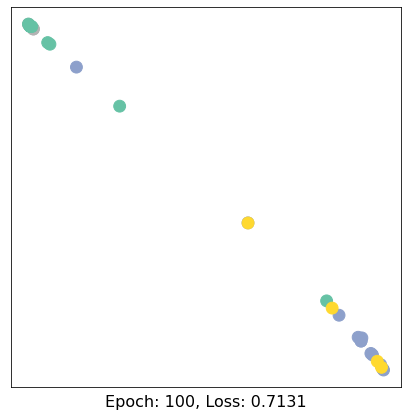

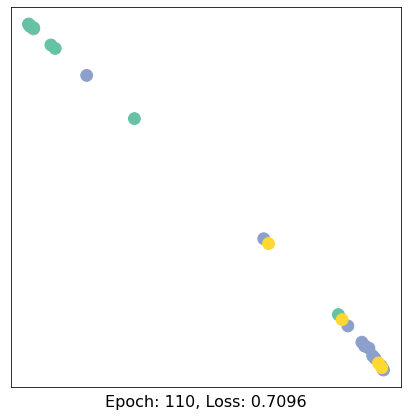

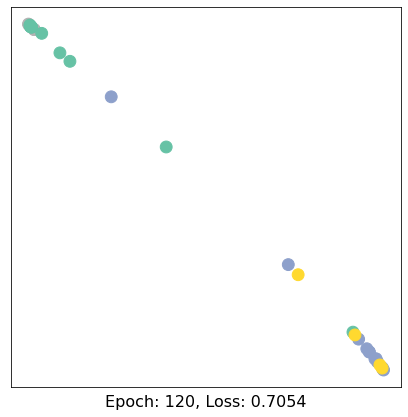

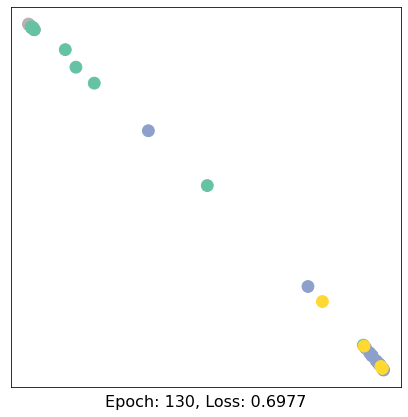

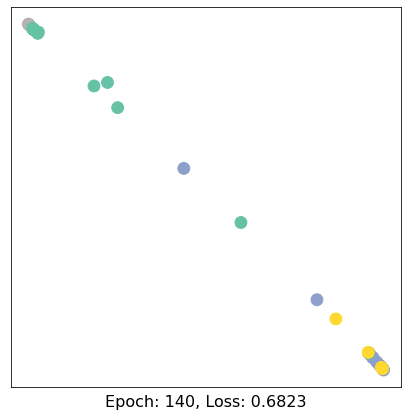

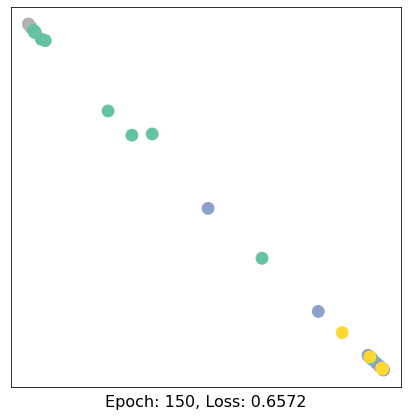

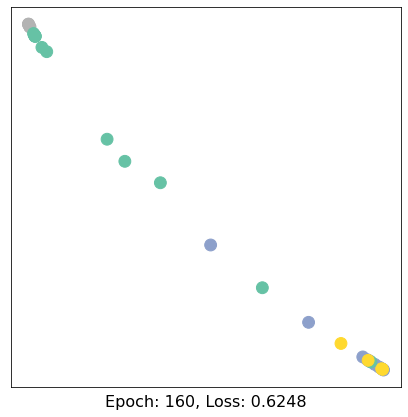

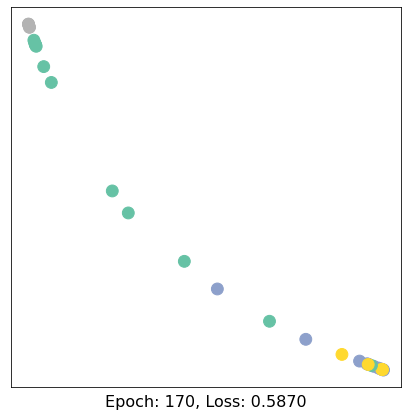

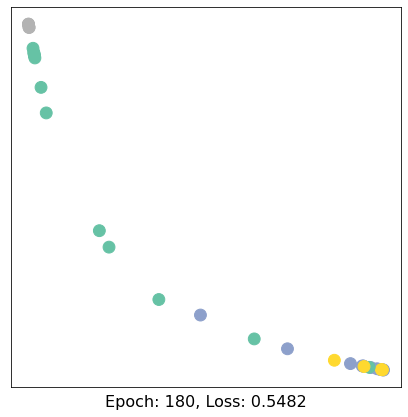

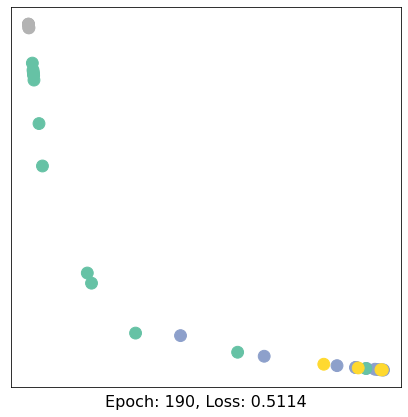

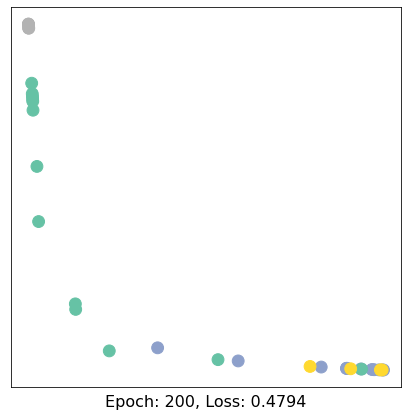

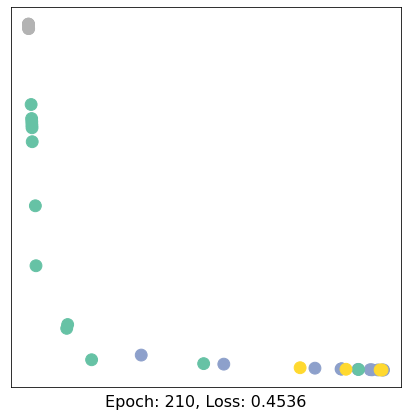

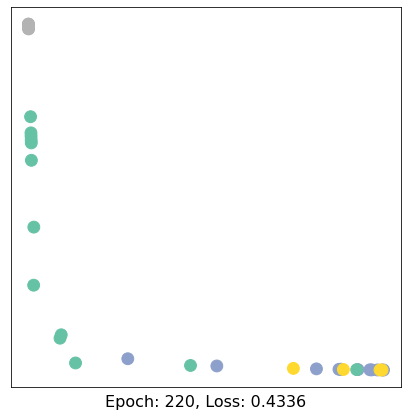

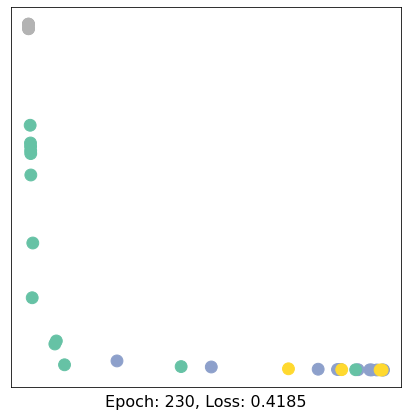

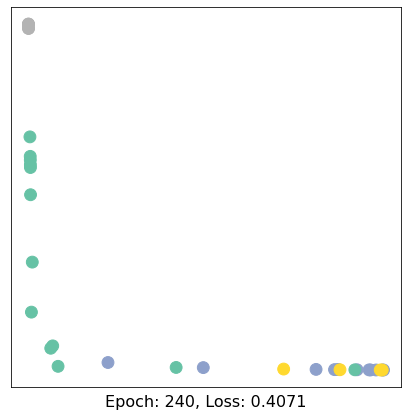

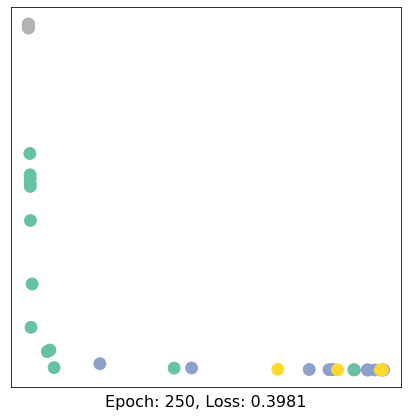

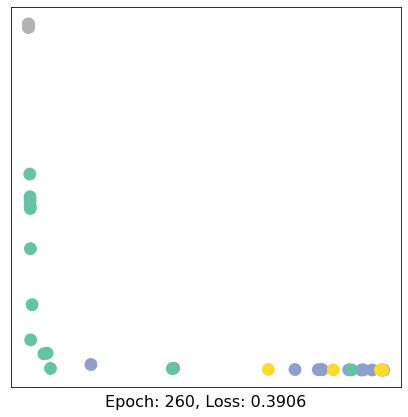

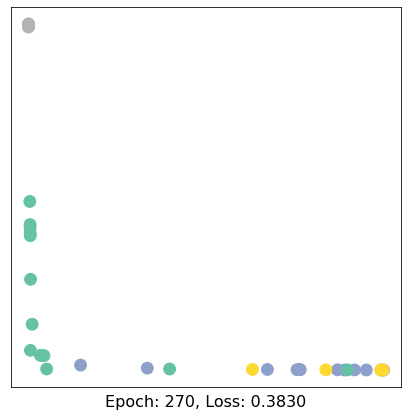

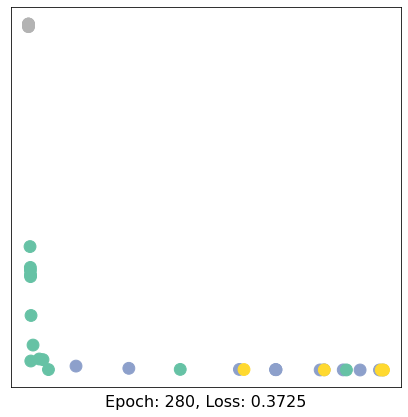

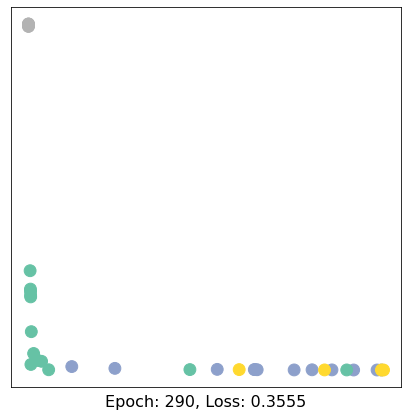

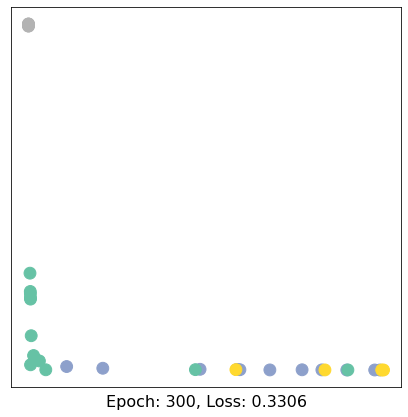

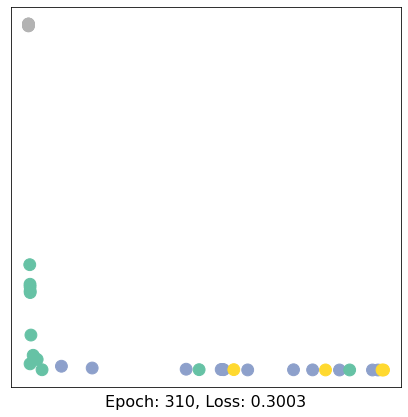

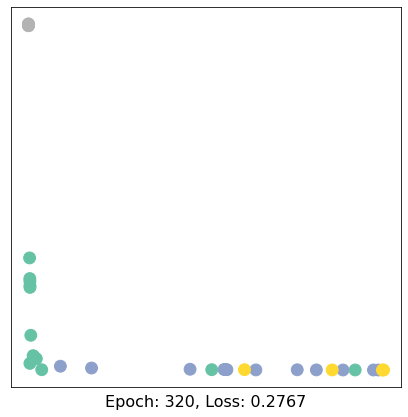

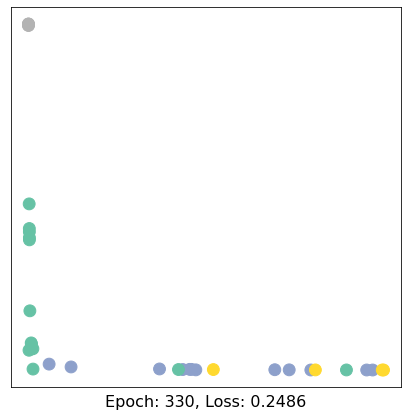

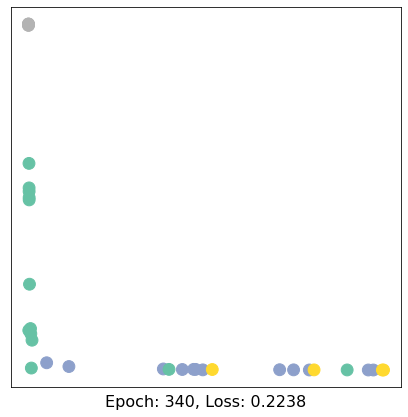

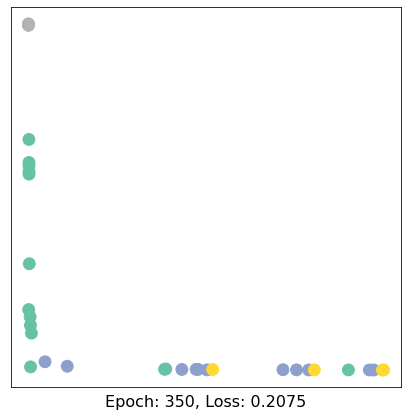

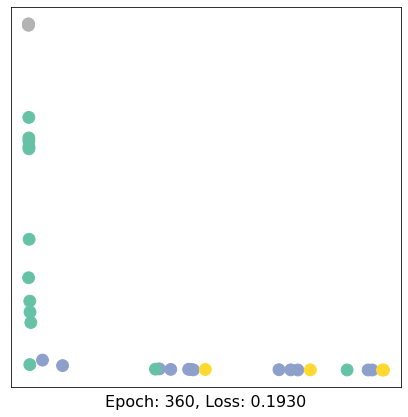

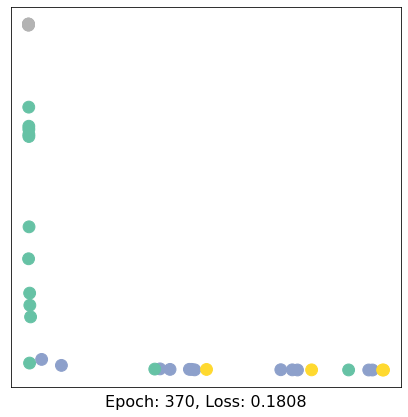

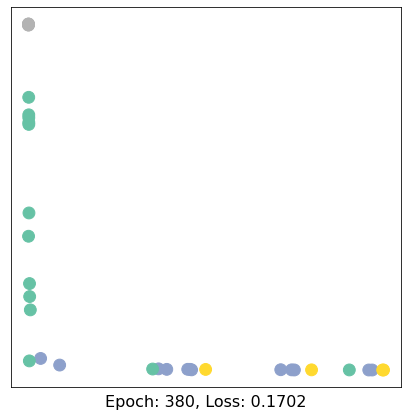

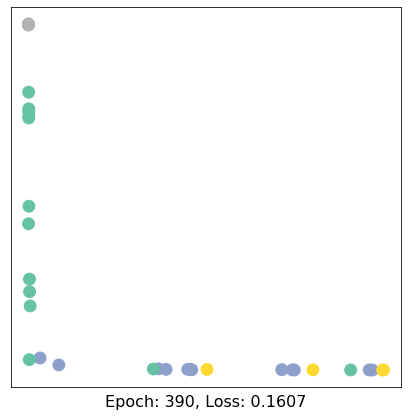

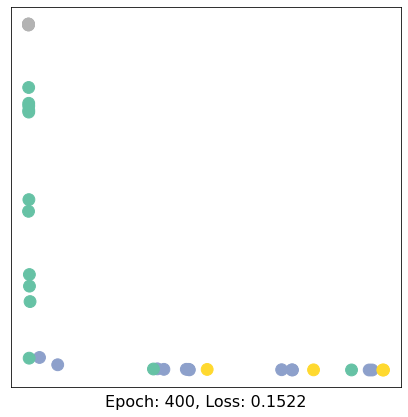

In [120]:
import time
# from IPython.display import Javascript
# display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 430})'''))
model = GCN()
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

def train(data):
    optimizer.zero_grad()
    out, h = model(data.x, data.edge_index)
    # print(out[data.train_mask])
    # print("-"*50)
    # print(data.y[data.train_mask])
    loss = criterion(out[data.train_mask], data.y[data.train_mask])
    # print(loss)
    # print("-"*50)
    loss.backward()
    optimizer.step()
    return loss, h

for epoch in range(401):
    loss, h = train(data)
    if epoch % 10 == 0:
        visualize(h, color=data.y, epoch=epoch, loss=loss)
        time.sleep(0.3)

In [140]:
# 理解torch.nn.CrossEntropyLoss():
import torch.nn.functional as F
x = torch.tensor([[1, 2], [1, 3]])
print(x)
print(torch.sum(torch.exp(x), dim = 1).reshape(-1, 1)) # .unsqueeze(1)也能起到等价的效果
softmax = torch.exp(x)/torch.sum(torch.exp(x), dim = 1).reshape(-1, 1)
logsoftmax = torch.log(softmax)
print(logsoftmax)
target = torch.tensor([0, 2, 3, 1, 4])
one_hot = F.one_hot(target)
print(one_hot)

tensor([[1, 2],
        [1, 3]])
tensor([[10.1073],
        [22.8038]])
tensor([[-1.3133, -0.3133],
        [-2.1269, -0.1269]])
tensor([[1, 0, 0, 0, 0],
        [0, 0, 1, 0, 0],
        [0, 0, 0, 1, 0],
        [0, 1, 0, 0, 0],
        [0, 0, 0, 0, 1]])


In [142]:
print(data.x)
print(data.edge_index)

tensor([[1., 0., 0.,  ..., 0., 0., 0.],
        [0., 1., 0.,  ..., 0., 0., 0.],
        [0., 0., 1.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 1., 0., 0.],
        [0., 0., 0.,  ..., 0., 1., 0.],
        [0., 0., 0.,  ..., 0., 0., 1.]])
tensor([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,
          1,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,
          3,  3,  3,  3,  3,  4,  4,  4,  5,  5,  5,  5,  6,  6,  6,  6,  7,  7,
          7,  7,  8,  8,  8,  8,  8,  9,  9, 10, 10, 10, 11, 12, 12, 13, 13, 13,
         13, 13, 14, 14, 15, 15, 16, 16, 17, 17, 18, 18, 19, 19, 19, 20, 20, 21,
         21, 22, 22, 23, 23, 23, 23, 23, 24, 24, 24, 25, 25, 25, 26, 26, 27, 27,
         27, 27, 28, 28, 28, 29, 29, 29, 29, 30, 30, 30, 30, 31, 31, 31, 31, 31,
         31, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 33, 33, 33, 33, 33,
         33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33],
        [ 1,  2,  3,  4,  5,  6,  7,  8,